## MULTI-LAYER PERCEPTRON WITH THE MNIST DATASET

MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. The objective of this notebook is to use the multi layer perceptron (MLP) to classify images from the MNIST dataset.  

In [1]:
# load the data

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

C:\Users\Ihona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Convert it into a dataframe

import pandas as pd

df = pd.DataFrame(mnist.data)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ValueError: cannot reshape array of size 1 into shape (28,28)

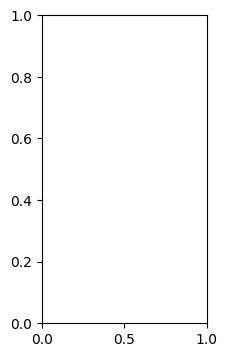

In [3]:
# data visualization

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

- Split the data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.15)

In [6]:
print(len(X_train))
print(len(X_test))

59500
10500


- Algorithm training

In [7]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)

# logistic is our sigmoid function
# A variant of gradient descent is the optimisation function

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [8]:
clf.n_layers_

3

In [9]:
clf.n_outputs_

10

In [10]:
clf.coefs_[0].shape #number of parameters that form the model 

(784, 10)

In [11]:
clf.coefs_[1] #dimensions of the first hidden layer

array([[-1.8871925 ,  1.00243011,  1.17278094, -0.98583588,  1.10875341,
        -1.20441971,  1.93442907, -1.40153416, -1.4327888 ,  1.07445508],
       [-0.92202443,  1.62128231, -0.9096197 , -0.29227008, -1.80322202,
        -1.03799443, -1.32015526,  1.58386184,  0.50647536,  2.23785359],
       [ 2.16191365, -1.76922499, -2.09303901, -2.11717227,  0.85521021,
         0.6009919 ,  1.88622288, -0.89250414, -0.07177788,  0.62235391],
       [ 2.21504184,  1.10237132,  2.00958833,  0.94857084, -0.4435036 ,
        -1.78048459, -0.86747925, -0.63479974, -1.32452653, -0.71814899],
       [ 1.52355649, -0.36998574, -1.25859944,  1.39717167, -1.21179055,
         2.14880389, -0.87091018,  1.26769778, -2.10363478,  0.10361661],
       [-1.45949717,  1.96837475,  1.64126556, -0.87283694, -0.79540944,
        -0.81415155, -0.52932028,  1.62638522,  1.45651217, -1.87806436],
       [-1.18844872,  2.00017175, -0.93934991,  2.50009476, -0.23512459,
        -0.90645003, -0.61518586, -0.17359784

In [12]:
clf.intercepts_[0].shape #bias that form part of each layer

(10,)

- Prediction with the test set

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.896793629300128

If I increase the neuron number of the hidden layer (parameter hidden_layer_sizes in the MLPClassifier function) I have a more flexible and complex model (the prediction will be better). Therefore, we will repeat all these steps but with 50 neurons to see if we can train a model that leads to better predictions.

In [16]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)


C:\Users\Ihona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), solver='sgd')

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.9512971633321357

Efectively, with 50 neurons on the hidden layer we get better f1 score than with 10 neurons. 